In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pylab as pl
from skimage import img_as_float
from skimage.io import imread, imshow

In [6]:
from skimage.io import imread
image = imread('parrots.jpg')

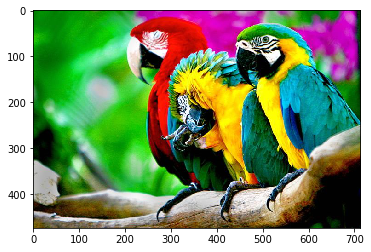

In [7]:
pl.imshow(image)

In [10]:
image_std = img_as_float(image)

In [11]:
a, b, c = image.shape
X = pd.DataFrame(np.reshape(image_std, (a*b, c)), columns=["Red", "Green", "Blue"])
X.head()

,Red,Green,Blue
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [16]:
def kmeans_clust(X, n_clusters):
    X = X.copy()

    clst = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    X["cluster"] = clst.fit_predict(X)

    return X

def mean_median_repl(X):
    means = X.groupby("cluster").mean().values
    mean_df = np.array([means[c] for c in X["cluster"]])
    mean_image = np.reshape(mean_df, (a, b, c))

    medians = X.groupby("cluster").median().values
    median_df = np.array([medians[c] for c in X["cluster"]])
    median_image = np.reshape(median_df, (a, b, c))

    return mean_image, median_image

In [18]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

Clustering: 1


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


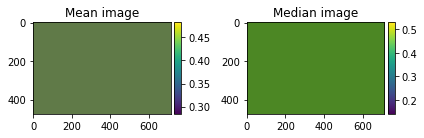

PSNR mean: 9.818835544771293   PSNR median: 9.427840460507397
Clustering: 2


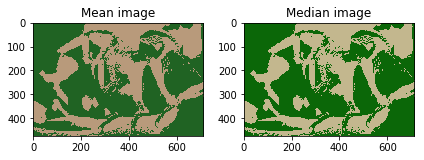

PSNR mean: 12.080177084931087   PSNR median: 11.655077266907849
Clustering: 3


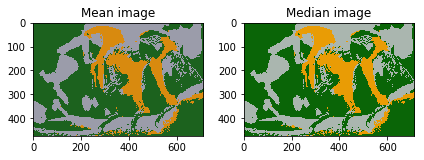

PSNR mean: 13.153487044607248   PSNR median: 12.774948175099812
Clustering: 4


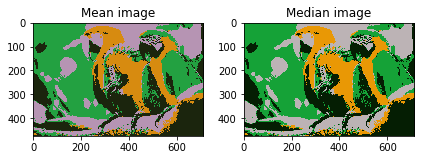

PSNR mean: 14.3678179408688   PSNR median: 14.005928721924676
Clustering: 5


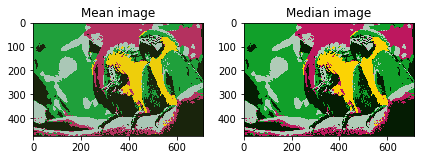

PSNR mean: 15.527146197305989   PSNR median: 15.17790907734613
Clustering: 6


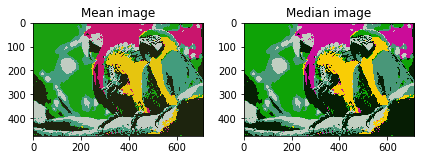

PSNR mean: 16.543994096630183   PSNR median: 16.051176778469276
Clustering: 7


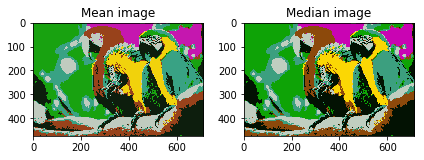

PSNR mean: 17.64099250863652   PSNR median: 17.339368491425024
Clustering: 8


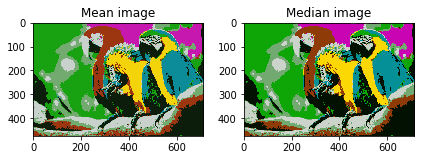

PSNR mean: 18.436829014063576   PSNR median: 18.1379714433961
Clustering: 9


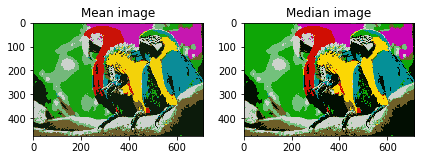

PSNR mean: 19.112672735788138   PSNR median: 18.81388735617062
Clustering: 10


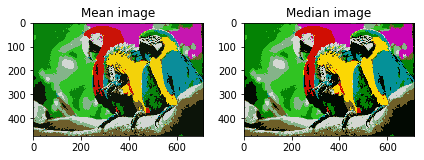

PSNR mean: 19.64075663591531   PSNR median: 19.417472515521055
Clustering: 11


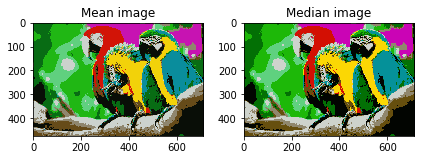

PSNR mean: 20.127588746514583   PSNR median: 19.84128407389954
11


In [20]:
def show_images(mean_image, median_image):
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

for i in range(1, 21):
    print(f"Clustering: {i}")
    
    clust_res = kmeans_clust(X, i)
    mean_image, median_image = mean_median_repl(clust_res)
    show_images(mean_image, median_image)
    
    psnr_mean, psnr_median = psnr(image_std, mean_image), psnr(image_std, median_image)
    print('PSNR mean: {}   PSNR median: {}'.format(psnr_mean,psnr_median))
    
    if psnr_mean > 20 or psnr_median > 20:
        print(i)
        break